In [1]:
from transform import *
from data import *
from model import *

In [2]:
path_300w = '/home/whale/dataset/Landmark/300W'
path_300w_lp = '/home/whale/dataset/Landmark/300W_LP'
path_train = os.path.join(path_300w, "train.xml")
path_test = os.path.join(path_300w, "test.xml")
path_all = os.path.join(path_300w, "all.xml")
path_lp = os.path.join(path_300w_lp, "all.txt")

composed = transforms.Compose([CropByLDK(1.4),
                               Flip(),
                               #Rotate(30),
                               #Gnoise(),
                               RandomCrop(),
                               Rescale((64,64)),
                               ToTensor(),
                               #Normalize()
                               ])
#inall = Ldk_300W_Dataset(path_all,path_300w)
#train = Ldk_300W_Dataset(path_train, path_300w)
#test = Ldk_300W_Dataset(path_test, path_300w, composed)
lp = Ldk_300W_LP_Dataset(path_lp, path_300w_lp, composed)

/home/whale/.local/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/whale/.local/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/whale/.local/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/whale/.local/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled 

(0, torch.Size([8, 3, 64, 64]), torch.Size([8, 68, 2]))
{'image': tensor([[[[0.0352, 0.0352, 0.0352,  ..., 0.0391, 0.0391, 0.0391],
          [0.0352, 0.0352, 0.0352,  ..., 0.0391, 0.0391, 0.0391],
          [0.0352, 0.0352, 0.0352,  ..., 0.0391, 0.0391, 0.0391],
          ...,
          [0.0220, 0.0000, 0.0098,  ..., 0.4941, 0.8096, 0.5461],
          [0.0103, 0.0244, 0.0400,  ..., 0.5681, 0.5852, 0.6548],
          [0.0222, 0.0100, 0.0081,  ..., 0.4124, 0.5120, 0.7627]],

         [[0.0195, 0.0195, 0.0195,  ..., 0.0234, 0.0234, 0.0234],
          [0.0195, 0.0195, 0.0195,  ..., 0.0234, 0.0234, 0.0234],
          [0.0195, 0.0195, 0.0195,  ..., 0.0234, 0.0234, 0.0234],
          ...,
          [0.1426, 0.1230, 0.2119,  ..., 0.0249, 0.1655, 0.0388],
          [0.0977, 0.1626, 0.2522,  ..., 0.0415, 0.0000, 0.0994],
          [0.0791, 0.1167, 0.1782,  ..., 0.0059, 0.0388, 0.0764]],

         [[0.0156, 0.0156, 0.0156,  ..., 0.0195, 0.0195, 0.0195],
          [0.0156, 0.0156, 0.0156,  ..., 0

{'image': tensor([[[[8.5294e-03, 1.3870e-02, 1.8799e-02,  ..., 1.1719e-02,
           2.6383e-02, 5.8627e-01],
          [4.1649e-03, 1.0651e-02, 5.0042e-02,  ..., 1.2543e-02,
           1.9047e-02, 2.9227e-01],
          [1.5625e-02, 1.5625e-02, 2.0966e-02,  ..., 1.1719e-02,
           8.4281e-04, 1.3898e-01],
          ...,
          [5.7881e-01, 5.7956e-01, 5.9861e-01,  ..., 6.6579e-01,
           5.7763e-01, 4.2387e-02],
          [6.0168e-01, 6.0731e-01, 5.8818e-01,  ..., 6.4865e-01,
           3.1887e-01, 1.3230e-02],
          [5.9398e-01, 5.7460e-01, 5.3949e-01,  ..., 5.8781e-01,
           9.3346e-02, 9.2313e-03]],

         [[8.5294e-03, 1.3870e-02, 1.8799e-02,  ..., 7.8125e-03,
           4.9002e-03, 4.5865e-01],
          [4.1649e-03, 1.0651e-02, 5.0042e-02,  ..., 8.6365e-03,
           1.4701e-02, 1.7648e-01],
          [1.5625e-02, 1.5625e-02, 2.0966e-02,  ..., 7.8125e-03,
           2.2705e-02, 3.3346e-02],
          ...,
          [3.3195e-01, 3.4656e-01, 3.4471e-01,  .

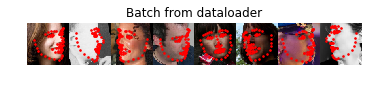

122450

In [3]:
dataloader = DataLoader(lp, batch_size=8, shuffle=True, num_workers=4)
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())
    print sample_batched
    # observe 4th batch and stop.
    if i_batch == 10:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break
len(lp)

In [4]:
net= MobileNetV2()

16 24 2 6
24 24 1 6
24 32 2 6
32 32 1 6
32 64 2 6
64 64 1 6


tensor([[[[-1.0727, -0.9126,  0.4372, -0.6424],
          [-0.6397,  0.5711,  0.6108, -0.4465],
          [-2.2194,  1.7518,  1.4568,  0.0802],
          [ 0.0844,  4.5174,  1.9710,  0.8021]],

         [[ 0.2456,  1.2254, -1.2289, -1.3359],
          [-0.5374,  0.7972, -0.3367,  1.7260],
          [ 0.2703,  0.6640,  0.8246,  0.5137],
          [-0.7882,  1.9041, -1.6587,  2.2771]],

         [[-1.0185,  1.9973, -0.6229, -1.1426],
          [ 1.8572,  0.1150,  0.0830, -1.0269],
          [ 3.1999,  3.9575,  0.5619, -1.2943],
          [ 0.4335,  1.2270, -2.0019, -1.1700]],

         ...,

         [[-0.5176,  2.0830, -0.0538,  0.1588],
          [-1.0149, -0.6877, -0.6904,  1.0434],
          [-1.2752,  1.7090,  1.7046,  0.0853],
          [ 0.7547, -0.1037, -0.4909,  1.4201]],

         [[ 0.9862, -1.8805, -0.6511, -2.7229],
          [ 0.4598,  0.2041, -2.4148,  1.5456],
          [ 2.4407, -1.2565, -2.4179, -0.2251],
          [ 0.7978, -0.1368, -1.5540, -1.0330]],

         [[ 1.5

tensor([[ 0.0011,  0.0006,  0.0002,  ...,  0.0020, -0.0053, -0.0046],
        [ 0.0014,  0.0013, -0.0045,  ...,  0.0042, -0.0078,  0.0003],
        [ 0.0006,  0.0016, -0.0002,  ..., -0.0014,  0.0002,  0.0006],
        ...,
        [ 0.0026,  0.0065, -0.0078,  ...,  0.0005, -0.0020,  0.0005],
        [ 0.0086,  0.0023,  0.0042,  ...,  0.0060, -0.0020, -0.0078],
        [-0.0093,  0.0016, -0.0159,  ..., -0.0046,  0.0063, -0.0003]],
       grad_fn=<AddmmBackward>)
